### Project Scenario

You have been employed as a Data Scientist by a consultancy firm. The firm has a client who is a used car dealer. They have a special feature on Ford cars and they want your firm to design a model that can predict the optimum quotation price for the cars in their lot. They provide you with sales data for the past few years. The dataset contains different features of the cars and the price they were sold at.

The tasks assigned to you are as follows.

1. There might be a few duplicate entries and a few missing values in the dataset. Data cleaning will be a part of the assignment.
2. You have to perform exploratory data analysis to draw keen insights on the data and determine the effect of different features on the price. Some specific requests by the client include:
a. Identify number of sales for each fuel type
b. Identify which transmission type has more price outliers
3. Compare the models with linear, polynomial and ridge regressions on single and multiple variables to find the best performing model
4. Perform a Grid Search on the Ridge regression model to identify the optimum hyperparameter for the model for best performance.

In [21]:
%pip install seaborn

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-AI0271EN-SkillsNetwork/labs/v1/m3/data/used_car_price_analysis.csv"

In [8]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

path = URL

await download(path, "used_car_price_analysis.csv")

In [9]:
data = pd.read_csv('used_car_price_analysis.csv')

data

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,Fiesta,2017,Automatic,15944,Petrol,150.0,57.7,1.0,12000
1,Focus,2018,Manual,9083,Petrol,150.0,57.7,1.0,14000
2,Focus,2017,Manual,12456,Petrol,150.0,57.7,1.0,13000
3,Fiesta,2019,Manual,10460,Petrol,145.0,40.3,1.5,17500
4,Fiesta,2019,Automatic,1482,Petrol,145.0,48.7,1.0,16500
...,...,...,...,...,...,...,...,...,...
17961,B-MAX,2017,Manual,16700,Petrol,150.0,47.1,1.4,8999
17962,B-MAX,2014,Manual,40700,Petrol,30.0,57.7,1.0,7499
17963,Focus,2015,Manual,7010,Diesel,20.0,67.3,1.6,9999
17964,KA,2018,Manual,5007,Petrol,145.0,57.7,1.2,8299


# Data Preparation

### Write a python code that performs the following tasks:
1. Identify the columns of a data frame with missing values.
2. Replace the missing values thus identified with mean value of the column.
3. Deletes the duplicate entries from the data frame.

In [14]:
# Identify columns with missing values
cols_with_missing_values = data.columns[data.isnull().any()].tolist()


# Replace missing values with mean value of the column
for col in cols_with_missing_values:
    mean_value = data[col].mean()
    data[col].fillna(mean_value, inplace=True)

# Delete duplicate entries
data.drop_duplicates(inplace=True)


# Data Insights and Visualization

### Task1
Identify the 5 attributes that have the highest correlation with the price parameter.

Prompt: Write a python code that identifies the top 5 attributes with highest correlation with the target attribute in a data frame.

In [16]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Sort the correlation values with the target attribute
correlation_with_target = correlation_matrix['price'].abs().sort_values(ascending=False)

# Get the top 5 attributes with highest correlation
top_5_attributes = correlation_with_target[1:6].index.tolist()

print(top_5_attributes)

<ipython-input-16-afe7faee576a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


['year', 'mileage', 'engineSize', 'tax', 'mpg']


In [17]:
correlation_matrix

,year,mileage,tax,mpg,engineSize,price
year,1.000000,-0.708690,0.297188,-0.021702,-0.137582,0.635715
mileage,-0.708690,1.000000,-0.257546,0.117697,0.214692,-0.530483
tax,0.297188,-0.257546,1.000000,-0.502342,0.185355,0.405970
mpg,-0.021702,0.117697,-0.502342,1.000000,-0.262239,-0.346263
engineSize,-0.137582,0.214692,0.185355,-0.262239,1.000000,0.411451
price,0.635715,-0.530483,0.405970,-0.346263,0.411451,1.000000


### Task2
Count the number of cars under each unique value of fuelType attribute.

Prompt: Write a python code that counts the number of entries in a dataframe with each unique value of a specific attribute.

In [20]:
# Count the number of entries with each unique value of attribute 'A'
value_counts = data['fuelType'].value_counts()

value_counts

Petrol      12081
Diesel       5706
Hybrid         22
Electric        2
Other           1
Name: fuelType, dtype: int64

### Task 3
Create a Box plot to determine whether cars with automatic, manual or semi-auto type of transmission have more price outliers. Use the Seaborn library for creating the plot.

Prompt : Write a python code that creates a Seaborn box plot between a source and target attributes of a dataframe.

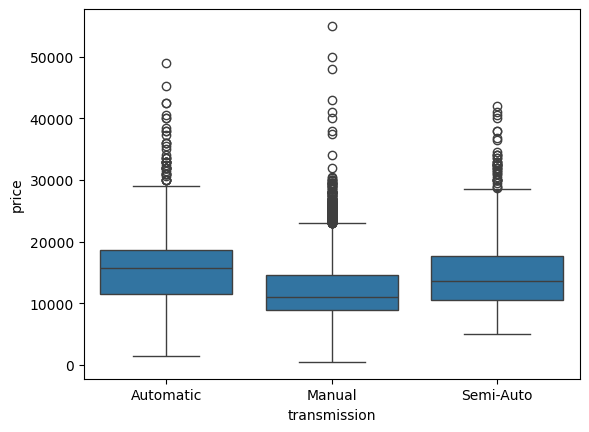

In [24]:
# Create a box plot using Seaborn
sns.boxplot(x='transmission', y='price', data=data)
plt.show()

### Task 4
Generate the regression plot between mpg parameter and the price to determine the correlation type between the two.

Prompt : Write a python code that creates a regression plot between a source attribute and a target attribute.

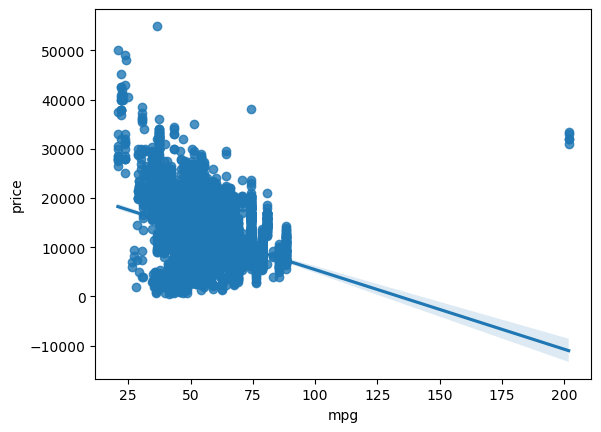

In [26]:
# Create a regression plot using Seaborn
sns.regplot(x='mpg', y='price', data=data)
plt.show()

# Model Development and Evaluation

### Task 1
Fit a linear regression model to predict the price using the feature mpg. Then calculate the R^2 and MSE values for the model.

Prompt : Write a python code to fit a linear regression model on a target variable on basis of a source variable. Calculate the R^2 values and MSE values for this model.

In [27]:
# Define the source and target variables
X = data[['mpg']]
y = data['price']

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Calculate R^2 value
r2 = r2_score(y, y_pred)

# Calculate Mean Squared Error
mse = mean_squared_error(y, y_pred)

print("R^2 value:", r2)
print("Mean Squared Error:", mse)

R^2 value: 0.1198980224962416
Mean Squared Error: 19741690.809446193


### Task 2
Fit a linear regression model to predict the price using the following set of features.year, mileage, tax, mpg and engineSize.
Calculate the R^2 and MSE values for this model.

Prompt : Write a python code to fit a linear regression model on a target variable on basis of a set of source variables. Calculate the R^2 values and MSE values for this model.

In [28]:
# Define the source and target variables
X = data[['year', 'mileage', 'tax', 'mpg', 'engineSize']]
y = data['price']

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Calculate R^2 value
r2 = r2_score(y, y_pred)

# Calculate Mean Squared Error
mse = mean_squared_error(y, y_pred)

print("R^2 value:", r2)
print("Mean Squared Error:", mse)

R^2 value: 0.7265379654547005
Mean Squared Error: 6134065.224381731


### Task 3
For the same set of features as in the question above, create a pipeline model object that uses standard scalar, second degree polynomial features and a linear regression model. Calculate the R^2 value and the MSE value for this model.

Prompt : Write a python code that can perform the following tasks.

1. Create a pipeline with standard scalar, second degree polynomial features and linear regression model.
2. Fit this pipeline for a target variable using a set of source attributes from a dataframe.
3. Evaluate the R^2 and MSE values for the trained model.

In [29]:
# Define the source and target variables
X = data[['year', 'mileage', 'tax', 'mpg', 'engineSize']]
y = data['price']

# Create a pipeline with standard scalar, polynomial features, and linear regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly_features', PolynomialFeatures(degree=2)),
    ('model', LinearRegression())
])

# Fit the pipeline
pipeline.fit(X, y)

# Make predictions
y_pred = pipeline.predict(X)

# Calculate R^2 value
r2 = r2_score(y, y_pred)

# Calculate Mean Squared Error
mse = mean_squared_error(y, y_pred)

print("R^2 value:", r2)
print("Mean Squared Error:", mse)

R^2 value: 0.7666619695239302
Mean Squared Error: 5234038.06546274


### Task 4
For the same set of features, split the data into training and testing data parts. Assume testing part to be 20%. Create and fit a Ridge regression object using the training data, set the regularization parameter to 0.1, and calculate the R^2 using the test data.

Prompt : Write a python code that can perform the following tasks.

1. Assuming that a subset of the attributes of a data frame are source attributes and one of the attributes is a target attribute, split the data into training and testing data assuming the testing data to be 20%.
2. Create and fit a Ridge regression model using the training data, setting the regularization parameter to 0.1.
3. Calculate the MSE and R^2 values for the Ridge Regression model using the testing data.

In [30]:
# Define the source and target variables
X = data[['year', 'mileage', 'tax', 'mpg', 'engineSize']]
y = data['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit a Ridge regression model
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = ridge_model.predict(X_test)

# Calculate R^2 value
r2 = r2_score(y_test, y_pred)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

print("R^2 value:", r2)
print("Mean Squared Error:", mse)

R^2 value: 0.6917134446113138
Mean Squared Error: 6912725.801054926


### Task 5
Perform a second order polynomial transform on both the training data and testing data created for the question above. Create and fit a Ridge regression object using the modified training data, set the regularisation parameter to 0.1, and calculate the R^2 and MSE utilising the modified test data.

Prompt : Write a python code that can perform the following tasks.

1. Assuming that a subset of the attributes of a data frame are source attributes and one of the attributes is a target attribute, split the data into training and testing data assuming the testing data to be 20%.
2. Apply second degree polynomial scaling to the training and testing data.
3. Create and fit a Ridge regression model using the training data, setting the regularization parameter to 0.1.
4. Calculate the MSE and R^2 values for the Ridge Regression model using the testing data.

In [31]:
# Define the source and target variables
X = data[['year', 'mileage', 'tax', 'mpg', 'engineSize']]
y = data['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply second degree polynomial scaling to the training and testing data
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Create and fit a Ridge regression model
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train_poly, y_train)

# Make predictions on the testing data
y_pred = ridge_model.predict(X_test_poly)

# Calculate R^2 value
r2 = r2_score(y_test, y_pred)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

print("R^2 value:", r2)
print("Mean Squared Error:", mse)

/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=2.17676e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


R^2 value: 0.6732748888228912
Mean Squared Error: 7326174.516559619


### Task 6
In the question above, perform a Grid Search on ridge regression for a set of values of alpha {0.01, 0.1, 1, 10, 100} with 4-fold cross validation to find the optimum value of alpha to be used for the prediction model.

Prompt : In the question above, perform a Grid Search on ridge regression for a set of values of alpha {0.01, 0.1, 1, 10, 100} with 4-fold cross validation to find the optimum value of alpha to be used for the prediction model.

In [32]:
# Define the source and target variables
X = data[['year', 'mileage', 'tax', 'mpg', 'engineSize']]
y = data['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply second degree polynomial scaling to the training and testing data
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Create a Ridge regression model
ridge_model = Ridge()
parameters = {'alpha': [0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(ridge_model, parameters, cv=4)
grid_search.fit(X_train_poly, y_train)

# Get the best alpha value
best_alpha = grid_search.best_params_['alpha']

# Create and fit a Ridge regression model with the best alpha value
ridge_model_best = Ridge(alpha=best_alpha)
ridge_model_best.fit(X_train_poly, y_train)

# Make predictions on the testing data
y_pred = ridge_model_best.predict(X_test_poly)

# Calculate R^2 value
r2 = r2_score(y_test, y_pred)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

print("Best Alpha value:", best_alpha)
print("R^2 value:", r2)
print("Mean Squared Error:", mse)

/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=2.93807e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=2.88233e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=3.01744e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=2.78199e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=2.93807e-24): res

Best Alpha value: 0.01
R^2 value: 0.38273414165607345
Mean Squared Error: 13840985.117578594


# Conclusion

Congratulations! You have completed this guided project on using Generative AI for different data science tasks.

By the end of this project, you are now capable of using Generative AI for the tasks of:

Data preparation - cleaning, transforming and augmentation
Data analysis - drawing insight, creating visualizations
Model development - creating simple as well as complex prediction models
Model refinement - found the optimum model using Grid Search